In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("cr_GTR_R4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          2.3961 ( 2.1353,  2.5472) ( 2.1653,  2.5648)  0.3995 (Jnode 142)\n',
 't_n74          2.2990 ( 2.0543,  2.4811) ( 2.0660,  2.4914)  0.4254 (Jnode 141)\n',
 't_n75          2.0130 ( 1.8011,  2.2161) ( 1.8101,  2.2234)  0.4133 (Jnode 140)\n',
 't_n76          1.9502 ( 1.7491,  2.1497) ( 1.7479,  2.1481)  0.4003 (Jnode 139)\n',
 't_n77          1.7279 ( 1.5550,  1.9122) ( 1.5531,  1.9102)  0.3570 (Jnode 138)\n',
 't_n78          1.6541 ( 1.4895,  1.8347) ( 1.4937,  1.8386)  0.3449 (Jnode 137)\n',
 't_n79          1.4066 ( 1.1916,  1.6122) ( 1.2049,  1.6228)  0.4178 (Jnode 136)\n',
 't_n80          1.1871 ( 0.9165,  1.4060) ( 0.9563,  1.4271)  0.4708 (Jnode 135)\n',
 't_n81          1.0707 ( 0.7884,  1.2820) ( 0.8596,  1.3151)  0.4555 (Jnode 134)\n',
 't_n82          0.9414 ( 0.6763,  1.1496) ( 0.7419,  1.1890)  0.4471 (Jnode 133)\n',
 't_n83          0.8908 ( 0.6310,  1.1015) ( 0.6932,  1.1394)  0.4462 (Jnode 132)\n',
 't_n84          0.8439 ( 0.5900,  1.0550) ( 0.6396,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[2.3961,
 2.299,
 2.013,
 1.9502,
 1.7279,
 1.6541,
 1.4066,
 1.1871,
 1.0707,
 0.9414,
 0.8908,
 0.8439,
 0.7574,
 0.5421,
 0.4502,
 0.2046,
 0.0748,
 0.5896,
 0.5101,
 0.5548,
 1.0625,
 0.7267,
 0.1584,
 0.6739,
 0.6528,
 0.5766,
 1.5863,
 1.5388,
 1.5138,
 1.4783,
 1.4343,
 1.2811,
 0.8554,
 1.2845,
 1.0725,
 0.9901,
 0.5714,
 0.9945,
 0.4738,
 1.291,
 1.1449,
 0.8936,
 0.678,
 0.4752,
 0.9614,
 0.6336,
 0.6196,
 0.3312,
 0.123,
 1.0536,
 0.9831,
 0.9398,
 0.9258,
 0.8948,
 0.7972,
 0.8835,
 0.5798,
 0.89,
 0.855,
 0.8279,
 0.7306,
 0.5255,
 0.247,
 0.5865,
 0.7432,
 1.7077,
 1.3076,
 0.9055,
 1.6598,
 0.8548,
 0.4549]

In [7]:
lower_ci_iqtree

[2.1353,
 2.0543,
 1.8011,
 1.7491,
 1.555,
 1.4895,
 1.1916,
 0.9165,
 0.7884,
 0.6763,
 0.631,
 0.59,
 0.5145,
 0.3441,
 0.2769,
 0.1087,
 0.035,
 0.3547,
 0.2805,
 0.3236,
 0.7805,
 0.4816,
 0.0565,
 0.4243,
 0.3734,
 0.4781,
 1.4282,
 1.3827,
 1.3585,
 1.324,
 1.2828,
 1.0379,
 0.4725,
 1.126,
 0.9069,
 0.8165,
 0.3677,
 0.8196,
 0.2172,
 1.1412,
 0.9861,
 0.7112,
 0.4763,
 0.2647,
 0.4341,
 0.1962,
 0.1799,
 0.0799,
 0.0246,
 0.778,
 0.7263,
 0.6882,
 0.6743,
 0.6457,
 0.5553,
 0.6361,
 0.3449,
 0.642,
 0.6144,
 0.5923,
 0.5145,
 0.3476,
 0.1399,
 0.4799,
 0.5686,
 1.57,
 1.013,
 0.5437,
 1.5181,
 0.5594,
 0.2809]

In [8]:
upper_ci_iqtree

[2.5472,
 2.4811,
 2.2161,
 2.1497,
 1.9122,
 1.8347,
 1.6122,
 1.406,
 1.282,
 1.1496,
 1.1015,
 1.055,
 0.9683,
 0.7329,
 0.6343,
 0.3647,
 0.1495,
 0.8265,
 0.7616,
 0.7987,
 1.2735,
 0.9769,
 0.3621,
 0.9383,
 0.9172,
 0.6625,
 1.7437,
 1.6902,
 1.6638,
 1.6262,
 1.5809,
 1.4618,
 1.1883,
 1.4345,
 1.2393,
 1.1679,
 0.8064,
 1.1699,
 0.7095,
 1.4408,
 1.3,
 1.049,
 0.8599,
 0.6879,
 1.2862,
 1.0279,
 1.0228,
 0.7295,
 0.3595,
 1.2571,
 1.1631,
 1.1128,
 1.0969,
 1.0637,
 0.9731,
 1.0516,
 0.8139,
 1.0568,
 1.0176,
 0.9879,
 0.8834,
 0.6777,
 0.3793,
 0.6635,
 0.9117,
 1.8575,
 1.5332,
 1.1641,
 1.8134,
 1.308,
 0.5639]

In [9]:
file_LG = open("cr_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

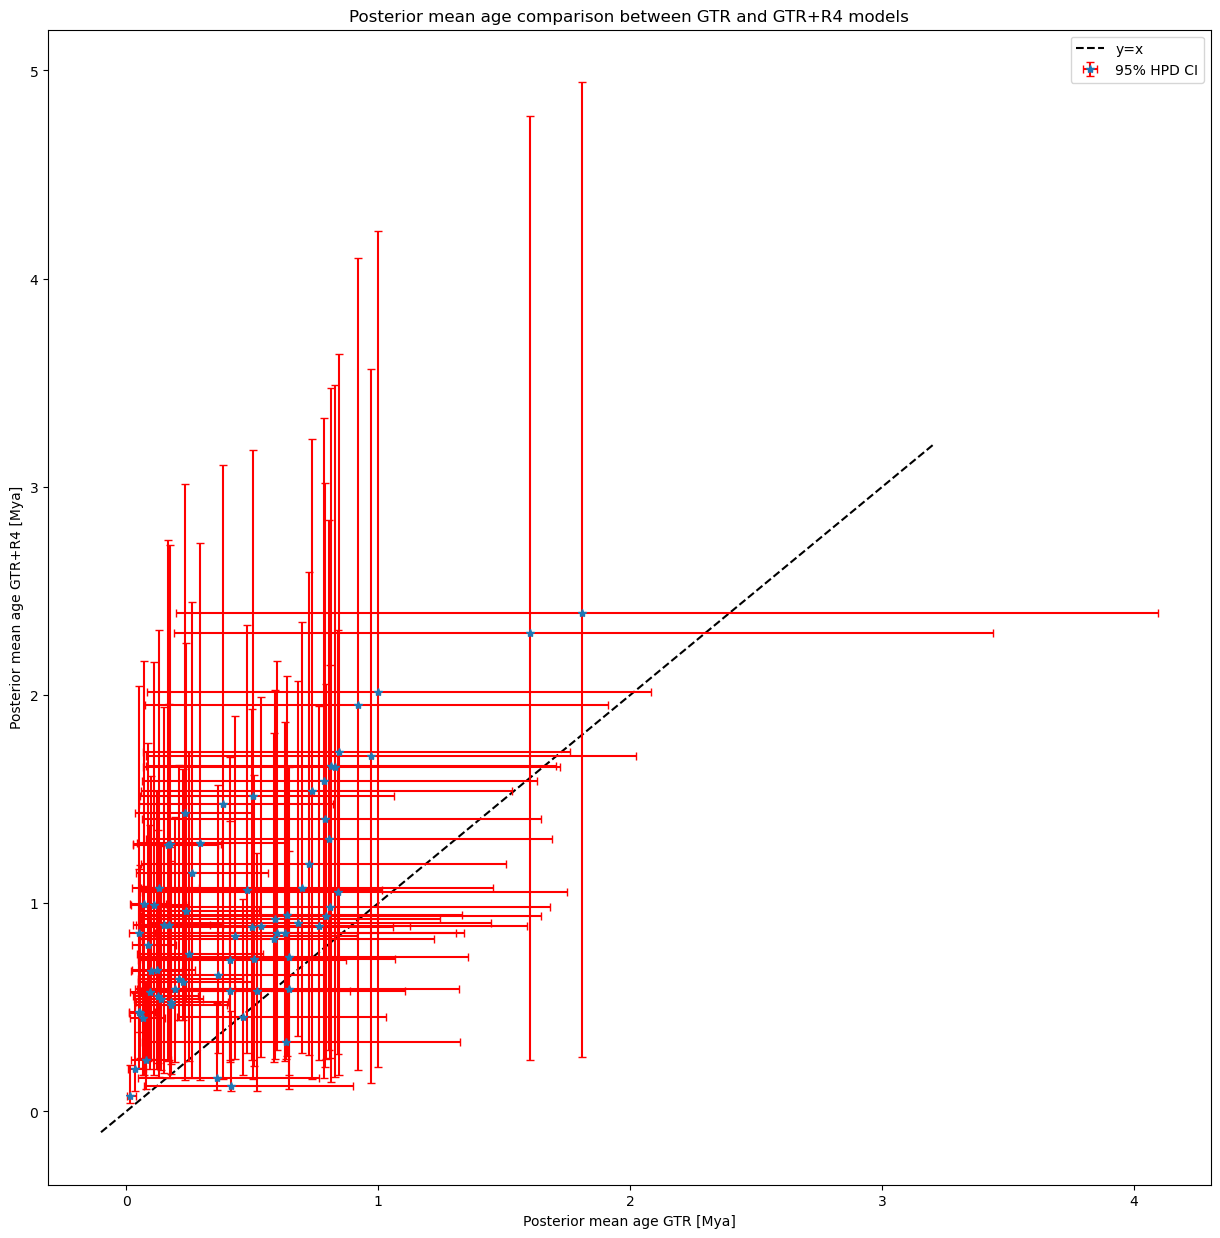

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_age_comparison_GTR_R4.png')

In [11]:
posterior_mean_baseml

[1.8095,
 1.6009,
 0.9982,
 0.9188,
 0.846,
 0.8285,
 0.7908,
 0.7248,
 0.6993,
 0.6388,
 0.5364,
 0.4313,
 0.2473,
 0.1362,
 0.0676,
 0.0348,
 0.0163,
 0.1947,
 0.1795,
 0.1271,
 0.4809,
 0.4103,
 0.3589,
 0.0982,
 0.3653,
 0.5198,
 0.7835,
 0.7362,
 0.5036,
 0.384,
 0.2317,
 0.1672,
 0.0511,
 0.1733,
 0.1316,
 0.1116,
 0.0933,
 0.0721,
 0.0529,
 0.2926,
 0.2604,
 0.1515,
 0.1239,
 0.0507,
 0.2374,
 0.2076,
 0.2261,
 0.6343,
 0.4162,
 0.8416,
 0.8093,
 0.7926,
 0.5918,
 0.1704,
 0.0849,
 0.498,
 0.4124,
 0.7662,
 0.6289,
 0.5857,
 0.5064,
 0.1797,
 0.0767,
 0.647,
 0.6471,
 0.9701,
 0.8062,
 0.6821,
 0.8141,
 0.5973,
 0.4627]

In [12]:
posterior_mean_iqtree

[2.3961,
 2.299,
 2.013,
 1.9502,
 1.7279,
 1.6541,
 1.4066,
 1.1871,
 1.0707,
 0.9414,
 0.8908,
 0.8439,
 0.7574,
 0.5421,
 0.4502,
 0.2046,
 0.0748,
 0.5896,
 0.5101,
 0.5548,
 1.0625,
 0.7267,
 0.1584,
 0.6739,
 0.6528,
 0.5766,
 1.5863,
 1.5388,
 1.5138,
 1.4783,
 1.4343,
 1.2811,
 0.8554,
 1.2845,
 1.0725,
 0.9901,
 0.5714,
 0.9945,
 0.4738,
 1.291,
 1.1449,
 0.8936,
 0.678,
 0.4752,
 0.9614,
 0.6336,
 0.6196,
 0.3312,
 0.123,
 1.0536,
 0.9831,
 0.9398,
 0.9258,
 0.8948,
 0.7972,
 0.8835,
 0.5798,
 0.89,
 0.855,
 0.8279,
 0.7306,
 0.5255,
 0.247,
 0.5865,
 0.7432,
 1.7077,
 1.3076,
 0.9055,
 1.6598,
 0.8548,
 0.4549]

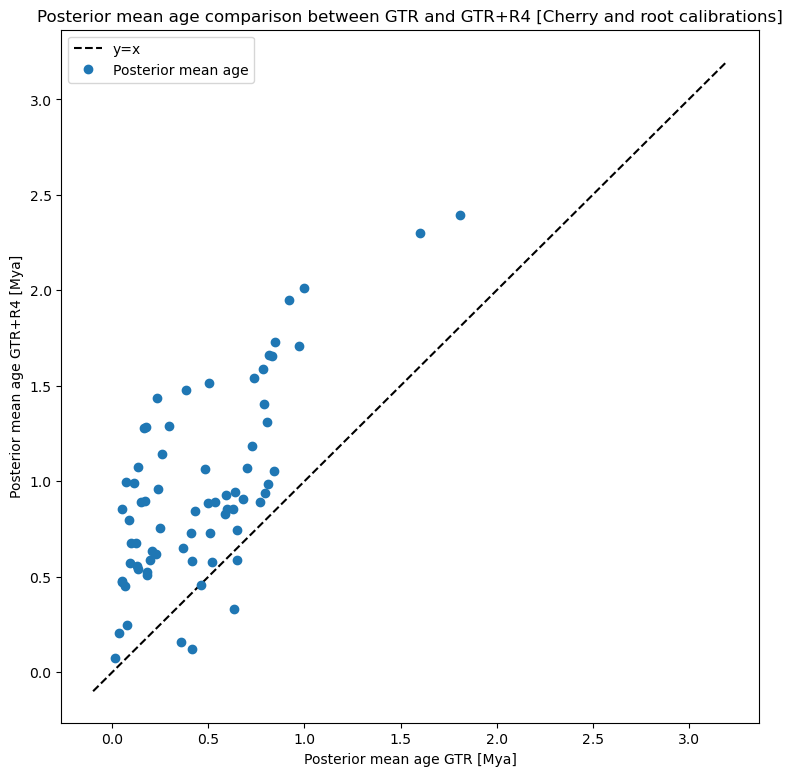

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_age_comparison_GTR_R4_scatter.png')

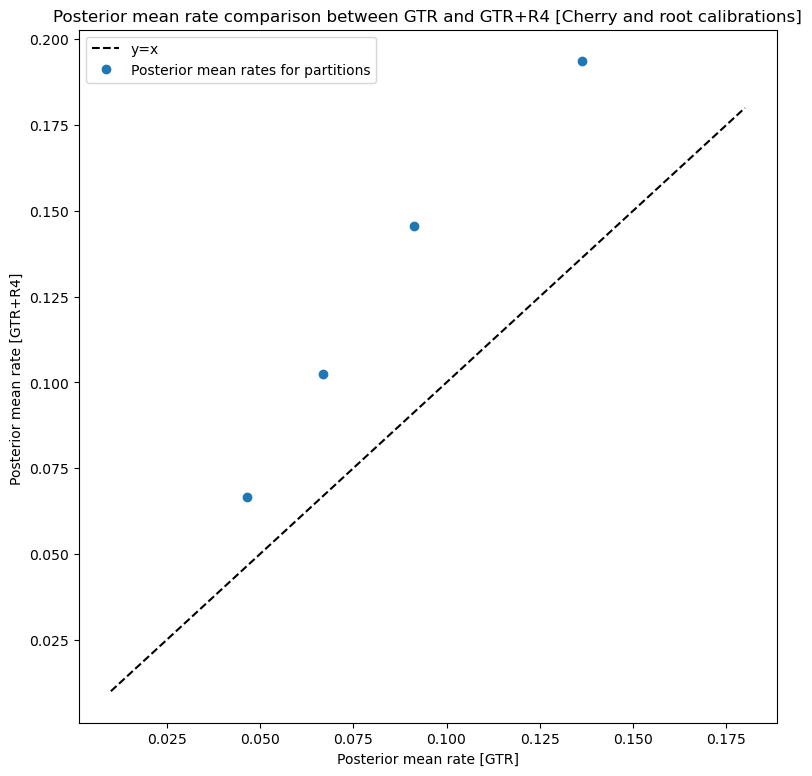

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+R4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+R4 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_rate_comparison_GTR_R4_all_scatter.png')